In [3]:
# Import OpenCV
import cv2
import matplotlib.pyplot as plt

In [4]:
# Import image
image = cv2.imread(r'people1.jpg')

In [5]:
# Shape of image
print(image.shape)
''' Width , Height, Channels(RGB)'''

(1280, 1920, 3)


' Width , Height, Channels(RGB)'

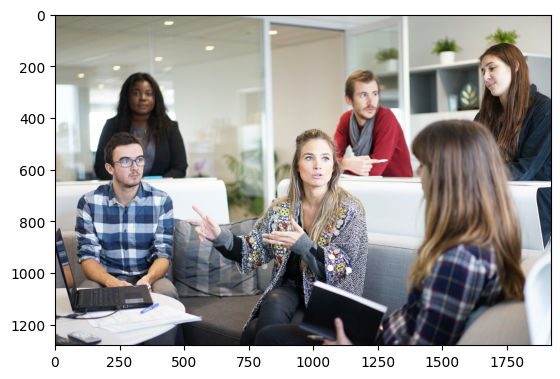

In [6]:
# Show image in matplotlib as opencv crashes
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [7]:
# Resize the image
image = cv2.resize(image, (800,600)) 
'''Quicker to detect faces with smaller images'''
image.shape

(600, 800, 3)

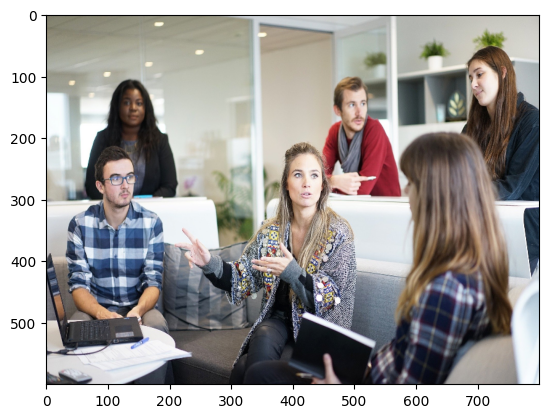

In [8]:
# Show image in matplotlib as opencv crashes
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

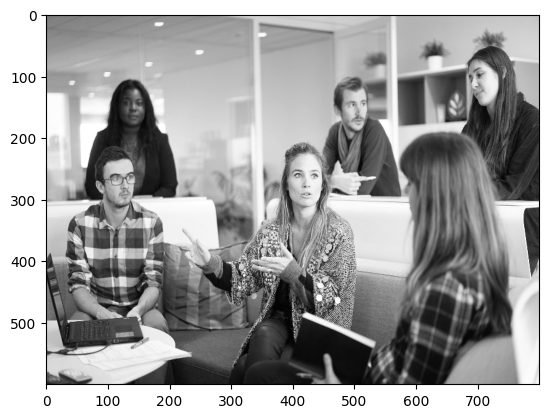

(600, 800)


In [9]:
# Greyscale image (recommended with cascade classifier)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap='gray', vmin=0, vmax=255)
plt.show()
print(image_gray.shape)

In [10]:
# Train classifier
face_detector = cv2.CascadeClassifier(r'haarcascade_frontalface_default.xml')

In [11]:
# Detect faces on greyscale images
detections = face_detector.detectMultiScale(image_gray)

In [12]:
print(detections)
'''First two values represent x and y values of face and the last two digits represent the size of the face (width + height)'''

[[115 124  53  53]
 [677  72  68  68]
 [475 123  59  59]
 [387 233  73  73]
 [ 92 239  66  66]
 [390 323  56  56]]


'First two values represent x and y values of face and the last two digits represent the size of the face (width + height)'

In [13]:
len(detections)

6

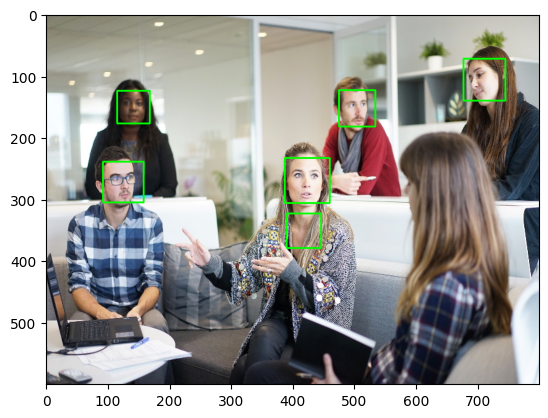

In [14]:
# Get start of each face
for (x,y,w,h) in detections:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [15]:
# Eye Detection
eye_detector = cv2.CascadeClassifier(r'haarcascade_eye.xml')

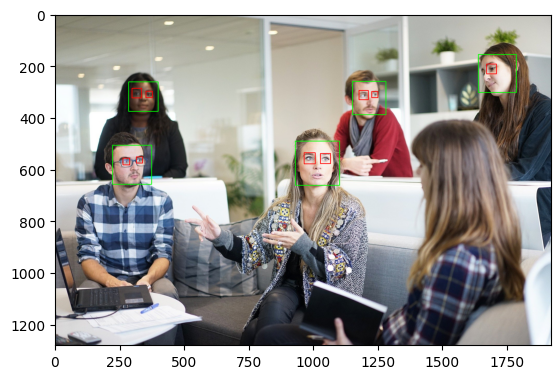

In [16]:
# Haarcascade parameters
image = cv2.imread(r'people1.jpg')
#image = cv2.resize(image, (800,600)) Making the size of image bigger can potentially improve detections at the expense of speed
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
detections = face_detector.detectMultiScale(image_gray, scaleFactor=1.3, minSize=(30,30)) 
'''scaleFactor should be adjusted based on size of faces in image. If faces are small a smaller value should be used'''
for (x, y, w, h) in detections:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

eye_detections = eye_detector.detectMultiScale(image_gray, scaleFactor=1.1, minNeighbors = 10, maxSize=(70,70))
for (x, y, w, h) in eye_detections:
    cv2.rectangle(image, (x,y), (x + w, y + h), (0,0,255), 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

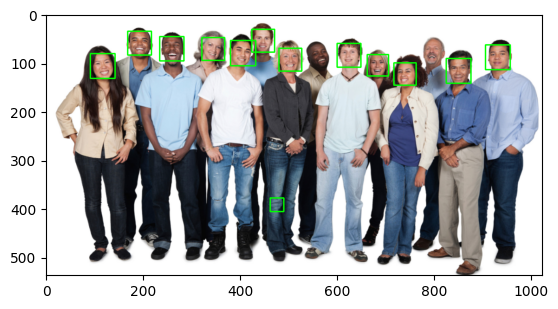

In [17]:
# Haarcascade parameters different image
image = cv2.imread(r'people2.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
detections = face_detector.detectMultiScale(image_gray, scaleFactor= 1.2, minNeighbors=5, minSize=(10,10), maxSize=(100,100))
'''minNeighbors denotes the minimum number of candidate rectangles for rectangle to be generated. Higher value higher quality of detections. 
minSize generates rectangles for faces with > minimum size. Vice versa with maxSize'''
for (x,y,w,h) in detections:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

Face Detection with HOG, Dlib and CNN

In [18]:
# Import
import dlib

In [19]:
# Read image
image = cv2.imread(r'people2.jpg')

In [20]:
# Create detector
face_detector_hog = dlib.get_frontal_face_detector()

In [23]:
# Detect
detections = face_detector_hog(image, 1) # second value is used to adjust size of retangles for detection
'''doesn't require greyscale unlike CascadeClassifier'''

"doesn't require greyscale unlike CascadeClassifier"

In [25]:
detections, len(detections)
'''detected all faces'''

(rectangles[[(429, 38) (465, 74)], [(665, 90) (701, 126)], [(717, 103) (760, 146)], [(909, 70) (952, 113)], [(828, 98) (871, 142)], [(605, 70) (641, 106)], [(777, 62) (813, 98)], [(485, 78) (521, 114)], [(386, 60) (429, 103)], [(170, 41) (213, 84)], [(93, 89) (136, 132)], [(237, 50) (280, 94)], [(323, 50) (367, 94)], [(544, 65) (588, 108)]],
 14)

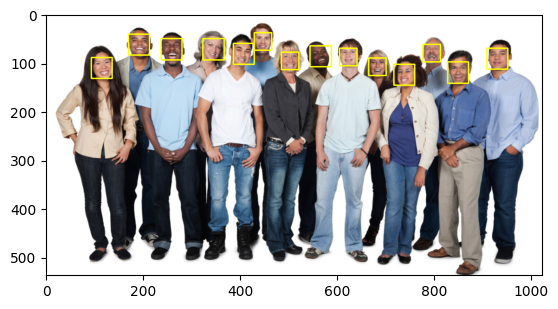

In [26]:
for face in detections:
    l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
    cv2.rectangle(image, (l, t), (r, b), (0, 255, 255), 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [29]:
# Detection with CNN
image = cv2.imread(r'people2.jpg')
cnn_detector = dlib.cnn_face_detection_model_v1(r'mmod_human_face_detector.dat')

1.1440682411193848
1.137049913406372
1.1278996467590332
1.1200228929519653
1.1149370670318604
1.1131553649902344
1.097571611404419
1.0942120552062988
1.085314154624939
1.0801892280578613
1.0800764560699463
1.0784764289855957
1.0664036273956299
1.0641793012619019


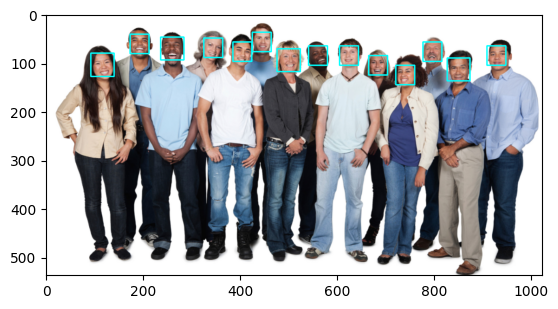

In [31]:
detections = cnn_detector(image, 1)
for face in detections:
    l, t, r, b, c = face.rect.left(), face.rect.top(), face.rect.right(), face.rect.bottom(), face.confidence
    '''The higher the confidence value the better'''
    print(c)
    cv2.rectangle(image, (l, t), (r, b), (255,255,0), 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()